# <center style="color:green"> ANL252 </center>
## <center style="color:green"> Python for Data Analytics </center>
<p>_______________________________________________________________________________________________________________________</p>

### <center> Tutor Marked-Assignment </center>
### <center> July 2022 Presentation </center>




### Import the required libraries 

In [1]:
# Import numpy library as np
import numpy as np
# Import pandas library as pd
import pandas as pd
# Import matplotlib import pyplot as plt
from matplotlib import pyplot as plt
# Import the library seaborn as snn 
import seaborn as sns
# Import matplotlib as mtpl 
import matplotlib as mtpl
# Adopt plotting style. the seaborn style looks good so I am using seaborn
plt.style.use('seaborn')
# Also make grid with white background 
sns.set_theme(style="whitegrid")
# Adopt font for the text in chart. I like Times New Roman so I am using "serif" as the font.family. 
mtpl.rcParams['font.family'] = 'serif'

### Import data into the jupyter as dataframe using pandas and view it  

In [2]:
givenData = pd.read_csv(r'C:\Users\vivia\Desktop\ANL252\TMA\TMA_Data.csv')
# Let's look at some rows of the data using head() function in pandas 
givenData.head()

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,10/07/1986,F,Single,Citizen,Yes,04/02/2012,NaN,Manufacturing,46335,Meet,3.4,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,05/12/2014,NaN,Manufacturing,66825,Meet,4.6,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.4,4,14
3,4,Aayan Ferrell,06/10/1984,M,Married,Citizen,No,01/05/2016,NaN,Admin,93046,Meet,4.1,4,20
4,5,Ace Potter,09/08/1989,F,Divorced,Citizen,No,07/11/2011,09/06/2020,Manufacturing,50825,Meet,5.0,4,2


### Let us make the chart 1 i.e.,  boxplot of salary for each business unit

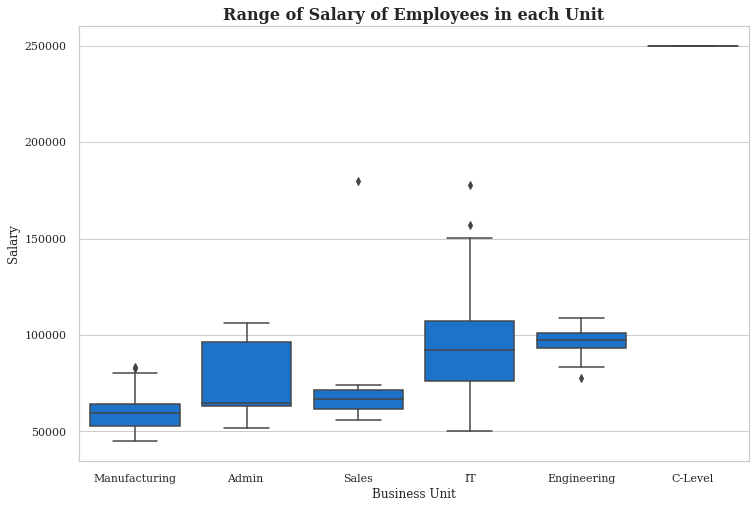

In [3]:
## Create a blank chart space with some specified width and height. I like width 12 pixel and height 8 pixel. 
plt.figure(figsize=(12,8)) 
## pyplot.figure() just create a blank space for chart and figsize(12,8) tells python that width and height should be 
## 12 and 8 pixels respectively. 
ax = sns.boxplot(x="Unit", y="Salary", data=givenData, color="#0073e6")
## seaborn.boxplot() makes a boxplot for categorical data and numerical data. 
## x = " categorical column", y=" numerical column" and data=" given data frame that we have imported", 
## I tried to match the color from excel using the color code : "#0073e6"
plt.ylabel("Salary", fontsize=12) # specify the y-axis label 
plt.xlabel("Business Unit", fontsize=12) # specify the x-axis label 
plt.title("Range of Salary of Employees in each Unit",fontdict= {'fontsize':16, 'fontweight':"bold"}) # Give some title to chart
plt.show() ## Show the plot

### Let us create the corresponding table to the above box plot.

In [4]:
data4table= givenData[['Unit', 'Gender', 'Salary']]
# Table for the above plot
data4table.groupby(['Unit']).describe()

Salary                                                    \
               count           mean           std       min        25%   
Unit                                                                     
Admin            7.0   77315.285714  21584.867305   51920.0   63001.50   
C-Level          1.0  250000.000000           NaN  250000.0  250000.00   
Engineering     10.0   95867.000000   9605.963715   77692.0   93090.75   
IT              41.0   95550.756098  29139.612035   50178.0   76029.00   
Manufacturing  169.0   59412.905325   8545.835276   45046.0   53018.00   
Sales           22.0   71426.590909  24888.012537   55875.0   61817.75   

                                              
                    50%        75%       max  
Unit                                          
Admin           64520.0   96198.50  106367.0  
C-Level        250000.0  250000.00  250000.0  
Engineering     97470.0  101003.25  108987.0  
IT              92328.0  107226.00  178000.0  
Manufacturing   59472.0   64246.00   83667.0  
Sales           67029.5   71615.00  180000.0

### Let us create the second chart. The chart of average absentees of both genders based on marital status

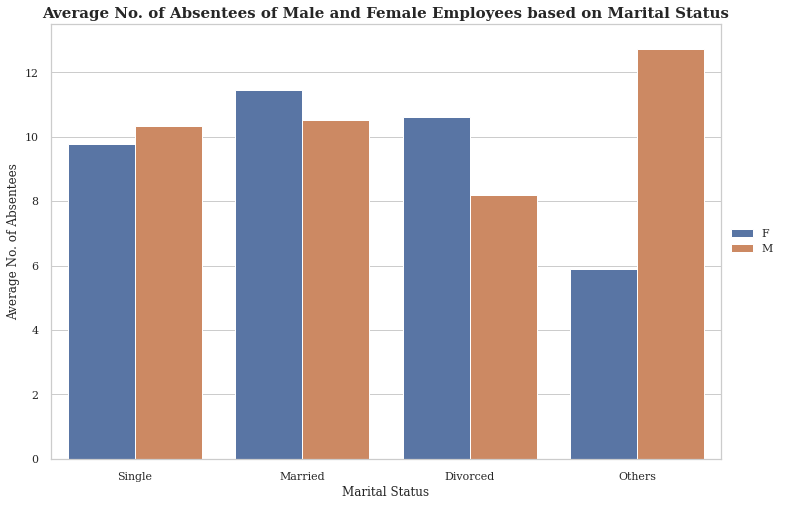

In [5]:
# Create an order list so that bins can be arranged as we obtained in Excel 
odrLst=["Single","Married","Divorced", "Others"]
# Create blank chart of width 12 and height 8 pixels
plt.figure(figsize=(12,8))
# Using seaborn.barplot() method we can create a cluster bar plot for the given data. 
ax = sns.barplot(x="Marital",y="Absence", data=givenData, hue="Gender", order=odrLst, estimator=np.mean, ci=0)
# In the above code, the argument x= " categorical column in our data", y=" Numerical column in given data"
# data=" the variable in which data is stored in Jupyter", hue= " Legend" 
# We need mean or average so I used nump.mean to average of salary in each category
# ci= confidence interval but I don't need confidence interval so I just put ci = 0
plt.legend(loc="center left", bbox_to_anchor=(1,0.5))  # position of legend on the chart. I like center left 
plt.ylabel("Average No. of Absentees", fontsize=12)  # y-axis label 
plt.xlabel("Marital Status", fontsize=12) # x-axis label
plt.title("Average No. of Absentees of Male and Female Employees based on Marital Status",fontdict= {'fontsize':15, 'fontweight':"bold"}) # title
plt.show() # show the plot 

### Let us create corresponding table to the above clustered bar graph

In [6]:
#Capturing the data for the second chart
data4table= givenData[['Marital', 'Gender', 'Absence']]
# Table for the below plot
data4table.groupby(['Marital']).describe()
# We can use groupby() method from pandas to get the mean of each category and reshape the table using unstack() method 
T1=data4table.groupby(['Marital', 'Gender']).mean().unstack()['Absence']
T1

Gender,F,M
Marital,,
Divorced,10.600000,8.181818
Married,11.448276,10.527778
Others,5.888889,12.714286
Single,9.774194,10.346154


### (Question 1c). Here we will just calculate the length of service of a staff

In [7]:
#We are given the data with some missing values of LeftDates. In the python the missing value is just nan 
# and its data-type is float. Length of service of a staff can be calculated using the basic algebra. 
# Length of Srvice = date of Joining  - date of Leaving the company.
# we can easily subtract integres and floats but here the data is date and time. 
# It is also mentioned that the Left date where it is missing, the date 1st May 2022 or 5/1/2022
# is to be considered as the leftDate.
# Now the missing values in the leftDate column must be replaced by 5/1/2022
# Let us replace the missing values in the givenData
updatedData = givenData.iloc[:].replace(np.nan, str("5/1/2022"))
# The date is in the string format. to make algebraic calculation, let us modified the column
# joinDate and leftDate as datetime 
updatedData['JoinDate'] = pd.to_datetime( updatedData['JoinDate']).dt.date
updatedData['LeftDate'] = pd.to_datetime(updatedData ['LeftDate']).dt.date
# It is the time to make calculation. The updatedData has JoinDate and LeftDate as datetime not string
updatedData['Length_of_Service']=(updatedData['LeftDate']-updatedData['JoinDate']).astype("timedelta64[D]")/365
#Now we have a new column Length_of_Service. It is the time to print minimum, maximum and average length of servic 
# from the column Length_of_Service
print(f"Result: The minimum duration of service is {round(updatedData['Length_of_Service'].min(),1)} year; "
+ f"the maximum duration of service is  {round(updatedData['Length_of_Service'].max(),1)} years and "
+f" the average duration of service is {round(updatedData['Length_of_Service'].mean(),1)} years. ")

Result: The minimum duration of service is 0.1 year; the maximum duration of service is  16.3 years and  the average duration of service is 6.8 years. 


### (d) Creating an interactive user interface. User will type the full name of an employee and program will find out if the typed name is in the record.  

In [ ]:
# For this part we have to make an infinite loop that runs until the user decide to exit the program. 
## We can make an infinite loop using for and while loop or try except statement. But we will use while
state = 1  # This is the condition to stop the program or continue the program for another task.
while state ==1:   # The loop will run until state is not equal to 1
    # Now we have to save input from the user. We have syntax "variable= input()"
    # The function input takes value from the keyboard and save it in the variable. 
    user_input = input("\nPlease enter the full name of the staff to be found in record:   ")
    ## Now we have the value to check in the record of column Staff. To do this we can use for or while loop.
    check=0 # condition to use the print on the screen. We have many options like a record can be found, not found, 
    # found but left the company or  found and still working. 
    for name_of_staff in givenData["Staff"]:  # Here name_of_Staff is a variable to get the value from data and check 
        # whether it matches the user_input
        if name_of_staff == user_input:
            state=1        
            break;
        else: state =0
    if state ==1: # If record found than we have to take join date and left date from the data
        record_check = givenData.loc[givenData["Staff"]==user_input]["LeftDate"].values[0]
        join_date= givenData.loc[givenData["Staff"]==user_input]["JoinDate"].values[0]
        if type(record_check)!=str: # Missing value is float and date is string so we check if value found not string
            # it means the employee has not left the organization. And he/she is still working. 
            print(f"\n{user_input} joined the organization on {join_date} and is still working.")
        else:  print(f"\n{user_input} joined the organization on {join_date} and left on {record_check}.")
    else: print(f"\n{user_input} is not found in the record.")
        # Now we have print the finding on the screen. we need to continue until user decide to quit. 
        # for this purpose, we will use while loop and try inside the while loop.
    while True:
        try: 
            state=int(input("\nDo you want to find record for other staff? " 
                            +"Please type 1 for Yes and any other number to Exit:   "))
            # To be successfully run the program, we to just update the value in state. 
            break
        except ValueError: print("\n !!Invalid input!! Please try again.")
    if state != 1: 
        print("\nIt was a pleasure to help. \nThank you.")



Please enter the full name of the staff to be found in record:   Addie Terrell

Addie Terrell joined the organization on 07/05/2011 and left on 09/05/2016.


### <center>Thank you</center> 